<a href="https://colab.research.google.com/github/sebastianamorteguim-cell/BICI-AL-TRABAJO-2026/blob/main/Copia1_de_Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

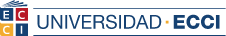
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [1]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

df.shape

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

(17379, 14)

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

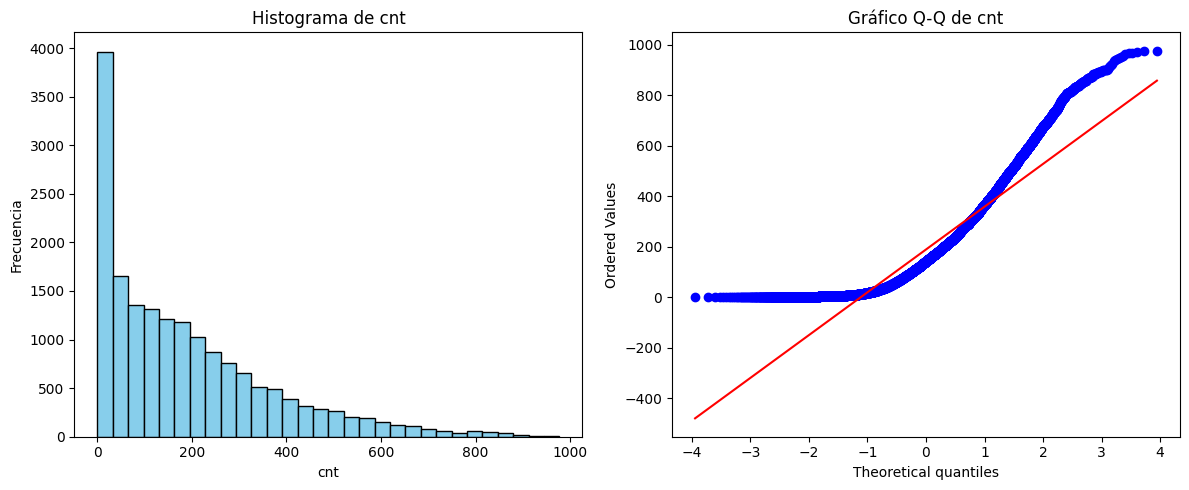

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Suponiendo que ya tienes cargado el DataFrame, por ejemplo:
# df = pd.read_csv('tu_archivo.csv')

# Histograma de 'cnt'
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de cnt')
plt.xlabel('cnt')
plt.ylabel('Frecuencia')

# Gráfico Q-Q
plt.subplot(1, 2, 2)
stats.probplot(df['cnt'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de cnt')

plt.tight_layout()
plt.show()


### **Interpretación pregunta 1**

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [29]:

from scipy.stats import pearsonr, spearmanr

# Variables a analizar
variables = ['temp', 'hum', 'windspeed']

print("Correlación con 'cnt':\n")

for var in variables:
    # Pearson
    pearson_corr, pearson_p = pearsonr(df['cnt'], df[var])
    # Spearman
    spearman_corr, spearman_p = spearmanr(df['cnt'], df[var])

    print(f"Variable: {var}")
    print(f"  Pearson  r = {pearson_corr:.3f} (p = {pearson_p:.4f})")
    print(f"  Spearman r = {spearman_corr:.3f} (p = {spearman_p:.4f})\n")

    print(f"  Correlación Spearman: {spearman_corr:.3f} (p-value = {p_value_spearman:.3e})\n")


Correlación con 'cnt':

Variable: temp
  Pearson  r = 0.405 (p = 0.0000)
  Spearman r = 0.423 (p = 0.0000)

  Correlación Spearman: 0.423 (p-value = 4.810e-63)

Variable: hum
  Pearson  r = -0.323 (p = 0.0000)
  Spearman r = -0.360 (p = 0.0000)

  Correlación Spearman: -0.360 (p-value = 4.810e-63)

Variable: windspeed
  Pearson  r = 0.093 (p = 0.0000)
  Spearman r = 0.127 (p = 0.0000)

  Correlación Spearman: 0.127 (p-value = 4.810e-63)



### **Interpretación pregunta 2**

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

Concepto clave:

El TLC dice que, para muestras suficientemente grandes, la distribución de la media muestral tiende a ser normal, sin importar la distribución original de la variable.

¿Desde qué tamaño muestral se puede aplicar?

Regla común:
Generalmente, se considera que con un tamaño muestral n ≥ 30 el TLC “justifica” aproximar la distribución de la media a una normal.

Dependiendo de la distribución original:
Si la distribución original de cnt es muy sesgada o tiene colas pesadas, puede necesitarse una muestra más grande para que el TLC funcione bien.

Para distribuciones normales o casi normales:
El TLC se cumple incluso para muestras pequeñas.

Respuesta para tu caso:

Si tienes un tamaño de muestra mayor o igual a 30, puedes usar pruebas y intervalos basados en normalidad para la media de cnt.

Si la muestra es más pequeña y la distribución de cnt no es normal, es mejor usar pruebas no paramétricas o técnicas bootstrap.


### **Respuesta pregunta 3**

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [32]:

from scipy.stats import ttest_1samp

# Filtramos los datos para días laborales
cnt_laboral = df[df['workingday'] == 1]['cnt']

# Parámetros de referencia
media_hipotetica = 4500

# Test t para una muestra (se asume normalidad aproximada por el TLC)
t_stat, p_val_bilateral = ttest_1samp(cnt_laboral, media_hipotetica)

# Ajuste para prueba unilateral (media > 4500)
p_val_unilateral = p_val_bilateral / 2 if t_stat > 0 else 1 - (p_val_bilateral / 2)

print(f"Media muestral: {cnt_laboral.mean():.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-valor unilateral: {p_val_unilateral:.4f}")
print(f"estadistico t: {t_stat:.3f}")
print(f"p-valor bilateral: {p_val_bilateral:.4f}")

#interpretacion el resultado
if p_val_unilateral < 0.05:
    print("Se rechaza la hipótesis nula. La media de cnt es significativamente mayor que 4500.")
else:
    print
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que la media de cnt es significativamente mayor que 4500.")


Media muestral: 193.21
t-statistic: -2534.334
p-valor unilateral: 1.0000
estadistico t: -2534.334
p-valor bilateral: 0.0000
No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que la media de cnt es significativamente mayor que 4500.


### **Interpretación pregunta 4**

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

IC Bootstrap 95% para la mediana de cnt: [139.00, 146.00]


(array([ 18.,  44., 109., 203., 259., 145., 116.,  70.,  23.,  13.]),
 array([137. , 138.1, 139.2, 140.3, 141.4, 142.5, 143.6, 144.7, 145.8,
        146.9, 148. ]),
 <BarContainer object of 10 artists>)

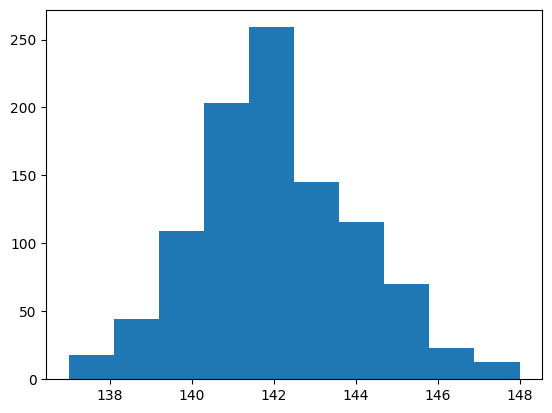

In [34]:

import numpy as np

import numpy as np

# Muestra original
data = df['cnt'].values

# Parámetros
n_bootstrap = 1000
np.random.seed(42)  # Reproducibilidad
bootstrap_medians = []

# Bootstrapping
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_medians.append(np.median(sample))

# Calcular percentiles (IC 95%)
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

print(f"IC Bootstrap 95% para la mediana de cnt: [{lower_bound:.2f}, {upper_bound:.2f}]")

plt.hist(medians)



Interpretación pregunta 5